Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1: Train Loss = 0.2250, Train Acc = 0.9314, Test Loss = 0.0496, Test Acc = 0.9830
Epoch 2: Train Loss = 0.0860, Train Acc = 0.9753, Test Loss = 0.0363, Test Acc = 0.9877
Epoch 3: Train Loss = 0.0647, Train Acc = 0.9808, Test Loss = 0.0347, Test Acc = 0.9885
Epoch 4: Train Loss = 0.0533, Train Acc = 0.9839, Test Loss = 0.0253, Test Acc = 0.9919
Epoch 5: Train Loss = 0.0439, Train Acc = 0.9867, Test Loss = 0.0264, Test Acc = 0.9919
Epoch 6: Train Loss = 0.0391, Train Acc = 0.9881, Test Loss = 0.0254, Test Acc = 0.9923
Epoch 7: Train Loss = 0.0334, Train Acc = 0.9896, Test Loss = 0.0249, Test Acc = 0.9921
Epoch 8: Train Loss = 0.0300, Train Acc = 0.9907, Test Loss = 0.0266, Test Acc = 0.9918
Epoch 9: Train Loss = 0.0263, Train Acc = 0.9919, Test Loss = 0.0258, Test Acc = 0.9921
Epoch 10: Train Loss = 0.0255, Train Acc = 0.9922, Test Loss = 0.0243, Test Acc = 0.9933


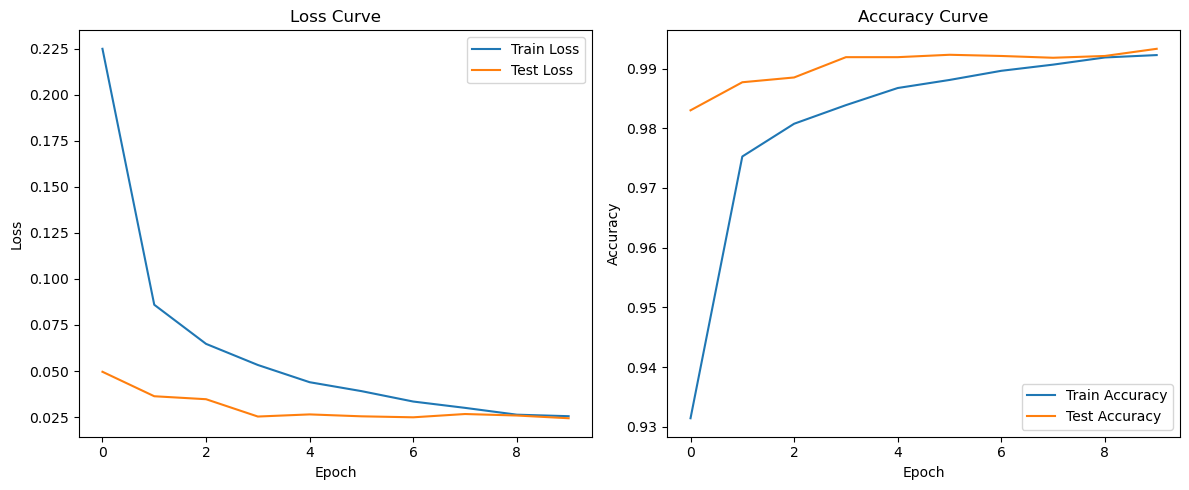

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 19 11:57:39 2025

@author: kahra
"""
#for question 1 codes are shown below

#implementation of libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Select device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data preprocessing and transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize to mean=0.1307, std=0.3081
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=64 * 5 * 5, out_features=128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x  # CrossEntropyLoss includes Softmax internally

# Instantiate model, loss function and optimizer
model = CNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training history
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(10):
    model.train()
    correct = 0
    total = 0
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluation on test set
    model.eval()
    correct = 0
    total = 0
    total_test_loss = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            total_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = total_test_loss / len(test_loader)
    test_accuracy = correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Acc = {test_accuracy:.4f}")

# Plotting loss and accuracy curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
#for question 2 codes are shown below 
#implementation of libs
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
# tarining models for 3 architectural variants
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)

        with torch.no_grad():
            dummy = torch.zeros(1, 1, 28, 28)
            dummy = self.pool(F.relu(self.conv1(dummy)))
            dummy = self.pool(F.relu(self.conv2(dummy)))
            dummy = self.pool(F.relu(self.conv3(dummy)))
            flatten_size = dummy.numel()

        self.fc1 = nn.Linear(flatten_size, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class DifferentKernelsCNN(nn.Module):
    def __init__(self):
        super(DifferentKernelsCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 1)
        self.pool = nn.MaxPool2d(2, 2)

        with torch.no_grad():
            dummy = torch.zeros(1, 1, 28, 28)
            dummy = self.pool(F.relu(self.conv1(dummy)))
            dummy = self.pool(F.relu(self.conv2(dummy)))
            flatten_size = dummy.numel()

        self.fc1 = nn.Linear(flatten_size, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class BatchNormLeakyCNN(nn.Module):
    def __init__(self):
        super(BatchNormLeakyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        with torch.no_grad():
            dummy = torch.zeros(1, 1, 28, 28)
            dummy = self.pool(F.leaky_relu(self.bn1(self.conv1(dummy))))
            dummy = self.pool(F.leaky_relu(self.bn2(self.conv2(dummy))))
            gap_size = dummy.size(1)  # Channels after conv layers

        self.fc = nn.Linear(gap_size, 10)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x))))
        x = self.pool(F.leaky_relu(self.bn2(self.conv2(x))))
        x = torch.mean(x, dim=[2,3])  # Global Average Pooling
        x = self.dropout(x)
        x = self.fc(x)
        return x

def train(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    avg_loss = running_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

def test(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    avg_loss = running_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

def run_training(model, epochs=10):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses, train_accs = [], []
    test_losses, test_accs = [], []

    for epoch in range(epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer)
        test_loss, test_acc = test(model, test_loader, criterion)

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print(f"Epoch {epoch+1}/{epochs} - Train loss: {train_loss:.4f}, Train acc: {train_acc:.4f}, Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

    return train_losses, train_accs, test_losses, test_accs

models = {
    "DeeperCNN": DeeperCNN(),
    "DifferentKernelsCNN": DifferentKernelsCNN(),
    "BatchNormLeakyCNN": BatchNormLeakyCNN()
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    train_losses, train_accs, test_losses, test_accs = run_training(model)
    results[name] = {
        "train_losses": train_losses,
        "train_accs": train_accs,
        "test_losses": test_losses,
        "test_accs": test_accs
    }

plt.figure(figsize=(15, 10))


Training DeeperCNN...
Epoch 1/10 - Train loss: 0.3577, Train acc: 0.8863, Test loss: 0.0809, Test acc: 0.9745
Epoch 2/10 - Train loss: 0.1094, Train acc: 0.9682, Test loss: 0.0692, Test acc: 0.9793
Epoch 3/10 - Train loss: 0.0799, Train acc: 0.9771, Test loss: 0.0544, Test acc: 0.9843
Epoch 4/10 - Train loss: 0.0637, Train acc: 0.9817, Test loss: 0.0581, Test acc: 0.9825
Epoch 5/10 - Train loss: 0.0545, Train acc: 0.9844, Test loss: 0.0527, Test acc: 0.9845
Epoch 6/10 - Train loss: 0.0464, Train acc: 0.9865, Test loss: 0.0478, Test acc: 0.9861
Epoch 7/10 - Train loss: 0.0389, Train acc: 0.9884, Test loss: 0.0457, Test acc: 0.9860
Epoch 8/10 - Train loss: 0.0336, Train acc: 0.9898, Test loss: 0.0633, Test acc: 0.9853
Epoch 9/10 - Train loss: 0.0284, Train acc: 0.9914, Test loss: 0.0595, Test acc: 0.9848
Epoch 10/10 - Train loss: 0.0256, Train acc: 0.9924, Test loss: 0.0504, Test acc: 0.9882

Training DifferentKernelsCNN...
Epoch 1/10 - Train loss: 0.3504, Train acc: 0.8926, Test loss: 

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

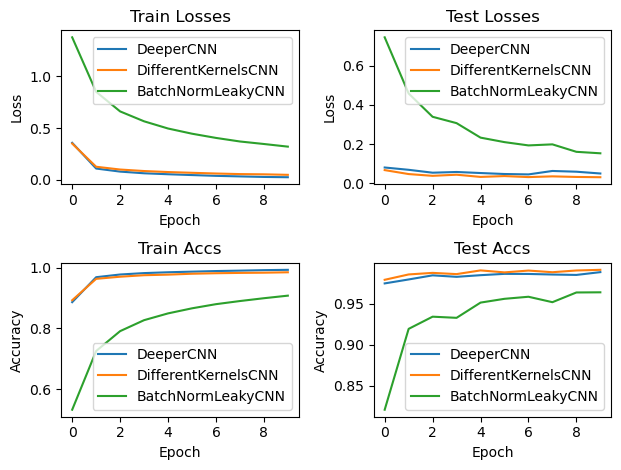

In [5]:
#graphs
for i, metric in enumerate(["train_losses", "test_losses"]):
    plt.subplot(2, 2, i+1)
    for name in models.keys():
        plt.plot(results[name][metric], label=name)
    plt.title(metric.replace("_", " ").title())
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

for i, metric in enumerate(["train_accs", "test_accs"]):
    plt.subplot(2, 2, i+3)
    for name in models.keys():
        plt.plot(results[name][metric], label=name)
    plt.title(metric.replace("_", " ").title())
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

plt.tight_layout()
plt.show()

Epoch 1: Train Loss = 0.2500, Test Loss = 0.0508, Test Acc = 98.34%
Epoch 2: Train Loss = 0.0887, Test Loss = 0.0371, Test Acc = 98.71%
Epoch 3: Train Loss = 0.0656, Test Loss = 0.0359, Test Acc = 98.70%
Epoch 4: Train Loss = 0.0548, Test Loss = 0.0271, Test Acc = 99.14%
Epoch 5: Train Loss = 0.0454, Test Loss = 0.0268, Test Acc = 99.12%
Epoch 6: Train Loss = 0.0401, Test Loss = 0.0245, Test Acc = 99.18%
Epoch 7: Train Loss = 0.0345, Test Loss = 0.0227, Test Acc = 99.26%
Epoch 8: Train Loss = 0.0308, Test Loss = 0.0203, Test Acc = 99.32%
Epoch 9: Train Loss = 0.0274, Test Loss = 0.0249, Test Acc = 99.27%
Epoch 10: Train Loss = 0.0249, Test Loss = 0.0193, Test Acc = 99.45%


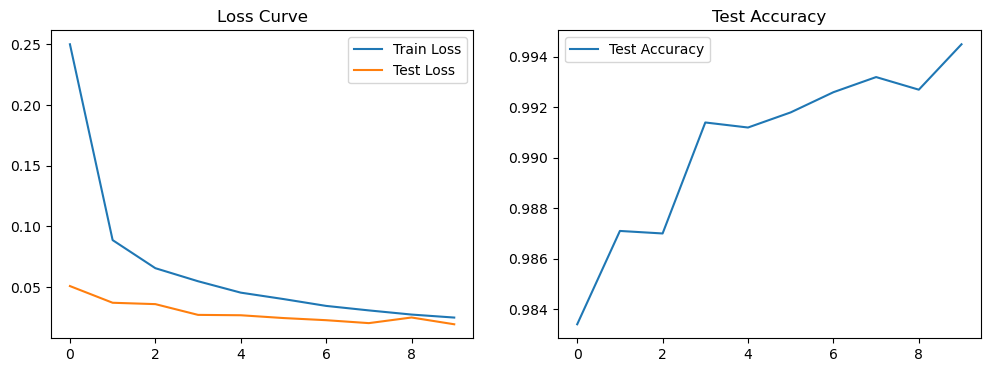

In [7]:

#For q3 I tried to design most ideal model. But for question 4 I designed some failed experimental models. They are emphesied in report
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time

# CNN Architecture
class CNN(nn.Module):
    def __init__(self, dropout_rate=0.5, weight_init="default"):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

        # Optional weight initialization
        if weight_init == "xavier":
            nn.init.xavier_uniform_(self.conv1.weight)
            nn.init.xavier_uniform_(self.conv2.weight)
        elif weight_init == "he":
            nn.init.kaiming_normal_(self.conv1.weight)
            nn.init.kaiming_normal_(self.conv2.weight)

    def forward(self, x): # change this funstion in order to remove ReLu
        x = self.pool(F.relu(self.conv1(x)))  # [batch, 32, 14, 14]    
        x = self.pool(F.relu(self.conv2(x)))  # [batch, 64, 7, 7]
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Training function
def train_model(config):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    transform = transforms.ToTensor()
    train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root='./data', train=False, download=False, transform=transform)

    train_loader = DataLoader(train_data, batch_size=config["batch_size"], shuffle=True)
    test_loader = DataLoader(test_data, batch_size=config["batch_size"], shuffle=False)

    model = CNN(dropout_rate=config["dropout"], weight_init=config["weight_init"]).to(device)
    
    criterion = nn.CrossEntropyLoss()

    if config["optimizer"] == "adam":
        optimizer = optim.Adam(model.parameters(), lr=config["lr"])
    elif config["optimizer"] == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=config["lr"], momentum=0.9)

    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(config["epochs"]):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_losses.append(running_loss / len(train_loader))

        # Evaluation
        model.eval()
        correct = 0
        total = 0
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                test_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(correct / total)

        print(f"Epoch {epoch+1}: Train Loss = {train_losses[-1]:.4f}, Test Loss = {test_losses[-1]:.4f}, Test Acc = {test_accuracies[-1]*100:.2f}%")

    # Plotting
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.legend()
    plt.title("Loss Curve")

    plt.subplot(1,2,2)
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.title("Test Accuracy")
    plt.legend()
    plt.show()

    #This config parameters rearranged in order to get failed models. 
config = {
    "lr": 0.001,
    "optimizer": "adam",
    "batch_size": 64,
    "dropout": 0.5,  # excessive dropout
    "weight_init": "default",
    "epochs": 10
}
train_model(config)